<a href="https://colab.research.google.com/github/mahimashrivastava2017/GitHubGraduation-2021/blob/main/CAPSTONE_PDAC_IMAGE_VIDEO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
!apt-get install libsm6 libxext6 libxrender-dev libcap-dev ffmpeg
!pip install --upgrade git+https://github.com/surfriderfoundationeurope/mot.git
!pip install --upgrade git+https://github.com/amartya-dev/mot.git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
libxrender-dev is already the newest version (1:0.9.10-1).
libxrender-dev set to manually installed.
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following NEW packages will be installed:
  libcap-dev
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 23.2 kB of archives.
After this operation, 95.2 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libcap-dev amd64 1:2.25-1.2 [23.2 kB]
Fetched 23.2 kB in 1s (24.9 kB/s)
Selecting previously unselected package libcap-dev:amd64.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../libcap-dev_1%3a2.25-1.2_amd64.deb ...
Unpacking libcap-dev:amd64 (1:2.25-1.2) ...
Setting up libcap-dev:amd64 (1:2.25-1.2) ...
Proces

In [3]:
import wget
from zipfile import ZipFile

wget.download("http://files.heuritech.com/raw_files/dataset_surfrider_cleaned.zip", ".")

with ZipFile('dataset_surfrider_cleaned.zip', 'r') as zipObj:
     zipObj.extractall()

In [4]:
wget.download("http://models.tensorpack.com/FasterRCNN/COCO-MaskRCNN-R50FPN2x.npz", ".")

'./COCO-MaskRCNN-R50FPN2x.npz'

In [7]:
!python3 -m mot.object_detection.train --load COCO-MaskRCNN-R50FPN2x.npz --logdir resnet50_fpn --config DATA.BASEDIR=dataset MODE_MASK=False TRAIN.LR_SCHEDULE=250,500,750

[0608 14:25:22 @logger.py:90] Argv: /usr/local/lib/python3.7/dist-packages/mot/object_detection/train.py --load COCO-MaskRCNN-R50FPN2x.npz --logdir resnet50_fpn --config DATA.BASEDIR=dataset MODE_MASK=False TRAIN.LR_SCHEDULE=250,500,750
[0608 14:25:22 @train.py:54] Environment Information:
--------------------  -------------------------------------------------------------------
sys.platform          linux
Python                3.7.10 (default, May  3 2021, 02:48:31) [GCC 7.5.0]
Tensorpack            v0.9.8-0-gb6318616
Numpy                 1.19.5
TensorFlow            1.15.2/v1.15.2-0-g5d80e1e8e6e
TF Compiler Version   7.5.0
TF CUDA support       True
TF MKL support        False
TF XLA support        False
Nvidia Driver         /usr/lib64-nvidia/libnvidia-ml.so.460.32.03
CUDA                  /usr/local/cuda-11.0/targets/x86_64-linux/lib/libcudart.so.11.0.221
CUDNN                 /usr/lib/x86_64-linux-gnu/libcudnn.so.7.6.5
NCCL                  /usr/lib/x86_64-linux-gnu/libnccl.so.2.7

In [8]:
!mkdir plastic_trained_resnet50_fpn

In [9]:
wget.download("https://files.heuritech.com/raw_files/surfrider/resnet50_fpn/model-6000.index", "plastic_trained_resnet50_fpn")
wget.download("https://files.heuritech.com/raw_files/surfrider/resnet50_fpn/model-6000.data-00000-of-00001", "plastic_trained_resnet50_fpn")

'plastic_trained_resnet50_fpn/model-6000.data-00000-of-00001'

**TEST IMAGE INPUT**

In [10]:
!python3 -m mot.object_detection.predict --load plastic_trained_resnet50_fpn/model-6000 --predict c.jpeg --config DATA.BASEDIR=dataset MODE_MASK=True


2021-06-08 15:39:01.735422: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-06-08 15:39:01.767325: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-08 15:39:01.768200: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla K80 major: 3 minor: 7 memoryClockRate(GHz): 0.8235
pciBusID: 0000:00:04.0
2021-06-08 15:39:01.768727: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-06-08 15:39:01.776726: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-06-08 15:39:01.779177: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2

**OUTPUT**

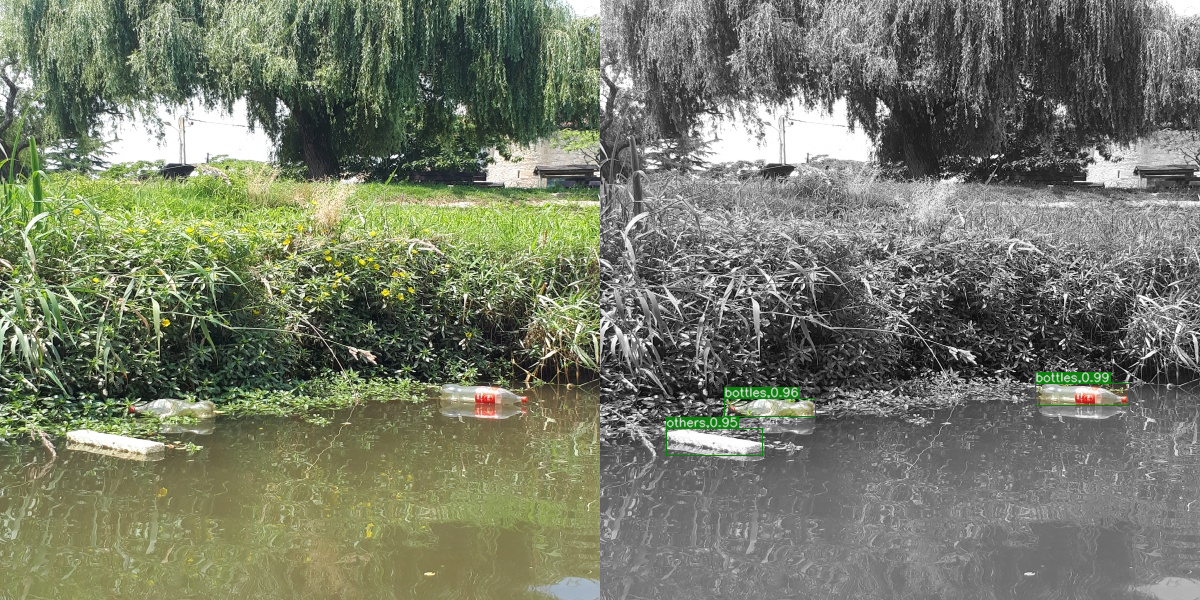

In [ ]:
from IPython.display import Image
Image('output.png')

In [15]:
!pip install pyngrok
!ngrok authtoken xxxxxxxxxxxxx

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [16]:
!pip install dash --upgrade
!pip install dash-bootstrap-components
!pip install jupyter-dash

Requirement already up-to-date: dash in /usr/local/lib/python3.7/dist-packages (1.20.0)


In [17]:
!pip install jupyter_dash
import plotly.express as px
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_html_components as html
import plotly.graph_objects as go
import dash_table
import base64
from dash.dependencies import Input, Output# Load Data
df = px.data.tips()# Build App

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.DARKLY])

SIDEBAR_STYLE = {"position": "fixed", "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "16rem",
    "padding": "2rem 1rem",
    "background-color": "#001E7D",
}
CONTENT_STYLE = {
    "margin-left": "18rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
}
VIDEO_STYLE={
    
}


image_filename = '/content/output.png' 
encoded_image = base64.b64encode(open(image_filename, 'rb').read())

image_filename3 = '/content/plasticimagepage2.jpeg' 
encoded_image3 = base64.b64encode(open(image_filename3, 'rb').read())

image_filename5 = '/content/giphy.gif' 
encoded_image5 = base64.b64encode(open(image_filename5, 'rb').read())

image_filename4 = '/content/imagepage13.gif' 
encoded_image4 = base64.b64encode(open(image_filename4, 'rb').read())

  



sidebar = html.Div(
    [
        html.H2("Sidebar", className="display-4"),
        html.Hr(),
        html.P(
            "Marine Plastic Litter", className="Plastic",style={'textAlign':'center'}
        ),
        dbc.Nav(
            [
                dbc.NavLink("Home", href="/", active="exact"),
                dbc.NavLink("Page 1", href="/page-1", active="exact"),
                dbc.NavLink("Page 2", href="/page-2", active="exact"),
            ],
            vertical=True,
            pills=True,
        ),
    ],
    style=SIDEBAR_STYLE,
)

content = html.Div(id="page-content", children=[], style=CONTENT_STYLE)

app.layout = html.Div([
    dcc.Location(id="url"),
    sidebar,
    content
])
      
@app.callback(
    Output("page-content", "children"),
    [Input("url", "pathname")]
)
def render_page_content(pathname):
    if pathname == "/":
        return [
                html.H1('Marine Litter Detection',style={'textAlign':'center'}),
                html.Br(),
                html.Iframe(src="https://www.youtube.com/embed/oISG9ppy6Yo",style={'height':'630px','width':'1000px'}),
                html.Br(),
                html.Br(),
                html.H1("SAVE EARTH!!"),
                html.Img(src='data:image/png;base64,{}'.format(encoded_image5.decode()),style={'height':'630px','width':'1000px'})
                ]
    elif pathname == "/page-1":
        return [
                html.H1('This is the Plastic detected in your Area',
                        style={'textAlign':'center'}),
                html.Img(src='data:image/png;base64,{}'.format(encoded_image.decode()))
                ]   
    elif pathname == "/page-2":
        return [
                html.H1('We need to Protect our Oceans',style={'textAlign':'center'}),
                html.Img(src='data:image/png;base64,{}'.format(encoded_image4.decode()),style={'height':'630px','width':'1000px'}),
                
                html.H1('Some of the Ananlysis',style={'textAlign':'center'}),
                html.Img(src='data:image/png;base64,{}'.format(encoded_image3.decode()))
                ]
     
# Define callback to update graph

In [18]:
app.run_server(mode='external', port=1919)

Dash app running on:


<IPython.core.display.Javascript object>

**VIDEO INPUT**

In [19]:
from mot.object_detection.config import config as cfg
from mot.object_detection.modeling.generalized_rcnn import ResNetC4Model, ResNetFPNModel
from mot.object_detection.dataset import register_mot
from tensorpack.predict import MultiTowerOfflinePredictor, OfflinePredictor, PredictConfig
from tensorpack.tfutils import SmartInit, get_tf_version_tuple
from mot.object_detection.config import finalize_configs

register_mot('dataset')
finalize_configs(is_training=False)

[0608 15:49:30 @config.py:308] Config: ------------------------------------------
{'BACKBONE': {'FREEZE_AFFINE': False,
              'FREEZE_AT': 2,
              'NORM': 'FreezeBN',
              'RESNET_NUM_BLOCKS': [3, 4, 6, 3],
              'STRIDE_1X1': False,
              'TF_PAD_MODE': False,
              'WEIGHTS': ''},
 'CASCADE': {'BBOX_REG_WEIGHTS': [[10.0, 10.0, 5.0, 5.0], [20.0, 20.0, 10.0, 10.0],
                                  [30.0, 30.0, 15.0, 15.0]],
             'IOUS': [0.5, 0.6, 0.7]},
 'DATA': {'ABSOLUTE_COORD': True,
          'BASEDIR': '/workspace/mot/dataset_surfrider_cleaned',
          'CLASS_NAMES': ['BG', 'bottles', 'others', 'fragments'],
          'NUM_CATEGORY': 3,
          'NUM_WORKERS': 10,
          'TRAIN': ('mot_train',),
          'VAL': ('mot_val',)},
 'FPN': {'ANCHOR_STRIDES': (4, 8, 16, 32, 64),
         'CASCADE': False,
         'FRCNN_CONV_HEAD_DIM': 256,
         'FRCNN_FC_HEAD_DIM': 1024,
         'FRCNN_HEAD_FUNC': 'fastrcnn_2fc_he

In [20]:
import cv2
from mot.object_detection.viz import (
    draw_annotation, draw_final_outputs, draw_predictions,
    draw_proposal_recall, draw_final_outputs_blackwhite)

load = 'plastic_trained_resnet50_fpn/model-6000'

MODEL = ResNetFPNModel() if cfg.MODE_FPN else ResNetC4Model()

predcfg = PredictConfig(
    model=MODEL,
    session_init=SmartInit(load),
    input_names=MODEL.get_inference_tensor_names()[0],
    output_names=MODEL.get_inference_tensor_names()[1]
)

predictor = OfflinePredictor(predcfg)

[0608 15:49:30 @sesscreate.py:38] WRN User-provided custom session config may not work due to TF bugs. See https://github.com/tensorpack/tensorpack/issues/497 for workarounds.

[0608 15:49:30 @registry.py:90] 'conv0': [1, 3, ?, ?] --> [1, 64, ?, ?]
[0608 15:49:30 @registry.py:90] 'pool0': [1, 64, ?, ?] --> [1, 64, ?, ?]

[0608 15:49:30 @registry.py:90] 'group0/block0/conv1': [1, 64, ?, ?] --> [1, 64, ?, ?]
[0608 15:49:30 @registry.py:90] 'group0/block0/conv2': [1, 64, ?, ?] --> [1, 64, ?, ?]
[0608 15:49:30 @registry.py:90] 'group0/block0/conv3': [1, 64, ?, ?] --> [1, 256, ?, ?]
[0608 15:49:30 @registry.py:90] 'group0/block0/convshortcut': [1, 64, ?, ?] --> [1, 256, ?, ?]
[0608 15:49:30 @registry.py:90] 'group0/block1/conv1': [1, 256, ?, ?] --> [1, 64, ?, ?]
[0608 15:49:30 @registry.py:90] 'group0/block1/conv2': [1, 64, ?, ?] --> [1, 64, ?, ?]
[0608 15:49:30 @registry.py:90] 'group0/block1/conv3': [1, 64, ?, ?] --> [1, 256, ?, ?]
[0608 15:49:31 @registry.py:90] 'group0/block2/conv1': [1

In [21]:
from PIL import Image
import numpy as np
import time
from mot.object_detection.predict import predict_on_np_image

filename = 'video_output.avi'
codec = cv2.VideoWriter_fourcc('W', 'M', 'V', '2')
cap = cv2.VideoCapture('/content/input video.avi')
framerate = round(cap.get(5),2)
w = int(cap.get(3))
h = int(cap.get(4))
resolution = (w, h)

VideoFileOutput = cv2.VideoWriter(filename, codec, framerate, resolution)    

while (cap.isOpened()):
    time_loop = time.time()
    print('processing frame number: ' + str(cap.get(1)))
    time_captureframe = time.time()
    ret, image_np = cap.read()
    print("time to capture video frame = " + str(time.time() - time_captureframe))
    if (ret != True):
        break
    output_np = predict_on_np_image(predictor, image_np)
    time_prediction = time.time()
    print("time to predict = " + str(time.time() - time_prediction))
    # Visualization of the results of a detection.
    time_visualizeboxes = time.time()
    VideoFileOutput.write(output_np)
    print("total time in the loop = " + str(time.time() - time_loop))

cap.release()
VideoFileOutput.release()
print('done')


processing frame number: 0.0
time to capture video frame = 0.04597139358520508
time to predict = 2.1457672119140625e-06
total time in the loop = 1.6439423561096191
processing frame number: 1.0
time to capture video frame = 0.005233287811279297
time to predict = 2.1457672119140625e-06
total time in the loop = 0.32914233207702637
processing frame number: 2.0
time to capture video frame = 0.0049457550048828125
time to predict = 2.384185791015625e-06
total time in the loop = 0.29697108268737793
processing frame number: 3.0
time to capture video frame = 0.003955841064453125
time to predict = 2.6226043701171875e-06
total time in the loop = 0.3118784427642822
processing frame number: 4.0
time to capture video frame = 0.004773378372192383
time to predict = 2.6226043701171875e-06
total time in the loop = 0.30214381217956543
processing frame number: 5.0
time to capture video frame = 0.003682851791381836
time to predict = 2.86102294921875e-06
total time in the loop = 0.3100438117980957
processin

In [22]:
!pip install jupyter_dash
import plotly.express as px
import dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_bootstrap_components as dbc
import dash_html_components as html
import plotly.graph_objects as go
import dash_table
import base64
from dash.dependencies import Input, Output# Load Data
df = px.data.tips()# Build App

app = JupyterDash(__name__, external_stylesheets=[dbc.themes.DARKLY])

SIDEBAR_STYLE = {"position": "fixed", "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "16rem",
    "padding": "2rem 1rem",
    "background-color": "#001E7D",
}
CONTENT_STYLE = {
    "margin-left": "18rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
}
VIDEO_STYLE={
    
}


image_filename = '/content/output.png' # replace with your own image
encoded_image = base64.b64encode(open(image_filename, 'rb').read())

image_filename3 = '/content/plasticimagepage2.jpeg' # replace with your own image
encoded_image3 = base64.b64encode(open(image_filename3, 'rb').read())

image_filename6 = '/content/newvideooutput.gif' # replace with your own image
encoded_image6 = base64.b64encode(open(image_filename6, 'rb').read())

image_filename5 = '/content/giphy.gif' # replace with your own image
encoded_image5 = base64.b64encode(open(image_filename5, 'rb').read())

image_filename4 = '/content/imagepage13.gif' # replace with your own image
encoded_image4 = base64.b64encode(open(image_filename4, 'rb').read())

  



sidebar = html.Div(
    [
        html.H2("Sidebar", className="display-4"),
        html.Hr(),
        html.P(
            "Marine Plastic Litter", className="Plastic",style={'textAlign':'center'}
        ),
        dbc.Nav(
            [
                dbc.NavLink("Home", href="/", active="exact"),
                dbc.NavLink("Page 1", href="/page-1", active="exact"),
                dbc.NavLink("Page 2", href="/page-2", active="exact"),
            ],
            vertical=True,
            pills=True,
        ),
    ],
    style=SIDEBAR_STYLE,
)

content = html.Div(id="page-content", children=[], style=CONTENT_STYLE)

app.layout = html.Div([
    dcc.Location(id="url"),
    sidebar,
    content
])
      
@app.callback(
    Output("page-content", "children"),
    [Input("url", "pathname")]
)
def render_page_content(pathname):
    if pathname == "/":
        return [
                html.H1('Marine Litter Detection',style={'textAlign':'center'}),
                html.Br(),
                html.Iframe(src="https://www.youtube.com/embed/oISG9ppy6Yo",style={'height':'630px','width':'1000px'}),
                html.Br(),
                html.Br(),
                html.H1("SAVE EARTH!!"),
                html.Img(src='data:image/png;base64,{}'.format(encoded_image5.decode()),style={'height':'630px','width':'1000px'})
                ]
    elif pathname == "/page-1":
        return [
                 html.H1('This is the Plastic detected in your Area',
                        style={'textAlign':'center'}),
                html.Img(src='data:image/png;base64,{}'.format(encoded_image6.decode()),style={'height':'630px','width':'1000px'})
                ]   
    elif pathname == "/page-2":
        return [
                html.H1('We need to Protect our Oceans',style={'textAlign':'center'}),
                html.Img(src='data:image/png;base64,{}'.format(encoded_image4.decode()),style={'height':'630px','width':'1000px'}),
                
                html.H1('Some of the Ananlysis',style={'textAlign':'center'}),
                html.Img(src='data:image/png;base64,{}'.format(encoded_image3.decode()))
                ]
     
# Define callback to update graph

In [23]:
app.run_server(mode='external', port=1919)

Dash app running on:


<IPython.core.display.Javascript object>